The MNIST handwritten digit classification problem is a standard dataset used in Computer Vision and Deep Learing Models.
Here we will harness the power of Neural Networks to build a deep learning model and train it for recognising __Handwritten Digits__. <br>
__NOTE__:The recognised digit is shown as a plot(digits vs probability).


In [1]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch import optim

#Defining a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
            transforms.Normalize((0.5,),(0.5,)),                    
            ])
#Downloading and training the dataset
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train= True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle = True)

In [2]:
#Building a feed-forward model

model = nn.Sequential(nn.Linear(784,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim = 1))
#Defining Loss
criterion = nn.NLLLoss()

#Getting the data
images, lables = next(iter(trainloader))

#Flatening the images
images = images.view(images.shape[0], -1)

#forward pass and get our probabilities(because of Softmax use in model)
logpbs = model(images)

#Calculating loss
loss = criterion(logpbs, lables)
print('Before Backward:\n', model[0].weight.grad)
loss.backward()
print('After Backward:\n', model[0].weight.grad)

Before Backward:
 None
After Backward:
 tensor([[-2.8558e-05, -2.8558e-05, -2.8558e-05,  ..., -2.8558e-05,
         -2.8558e-05, -2.8558e-05],
        [-1.7204e-03, -1.7204e-03, -1.7204e-03,  ..., -1.7204e-03,
         -1.7204e-03, -1.7204e-03],
        [ 5.4019e-04,  5.4019e-04,  5.4019e-04,  ...,  5.4019e-04,
          5.4019e-04,  5.4019e-04],
        ...,
        [-2.2437e-04, -2.2437e-04, -2.2437e-04,  ..., -2.2437e-04,
         -2.2437e-04, -2.2437e-04],
        [ 6.0656e-04,  6.0656e-04,  6.0656e-04,  ...,  6.0656e-04,
          6.0656e-04,  6.0656e-04],
        [ 4.8198e-04,  4.8198e-04,  4.8198e-04,  ...,  4.8198e-04,
          4.8198e-04,  4.8198e-04]])


In [3]:
print('Initial weights - ', model[0].weight)

optimizer = optim.SGD(model.parameters(), lr = 0.01)


images, labels = next(iter(trainloader))

images = images.view(images.shape[0], -1)

optimizer.zero_grad()

logpbs = model(images)
loss = criterion(logpbs, labels)
loss.backward()
print('Final weights - ', model[0].weight.grad)

optimizer.step()
print('Final weights - ', model[0].weight)

Initial weights -  Parameter containing:
tensor([[-1.0889e-02, -7.2019e-03, -4.6896e-04,  ...,  6.6161e-06,
         -4.1888e-03,  2.5887e-02],
        [-2.8772e-02, -3.1041e-02,  1.9158e-03,  ...,  2.4674e-02,
         -6.5933e-03,  3.0679e-02],
        [-3.0857e-02,  1.3269e-02,  1.1038e-05,  ...,  1.4617e-02,
          6.7315e-03,  2.4957e-02],
        ...,
        [ 8.3062e-04, -2.3143e-02, -3.2421e-02,  ..., -1.0852e-02,
         -3.4783e-02, -2.0181e-02],
        [-3.0668e-02,  2.0341e-04, -3.3294e-02,  ...,  2.3626e-02,
          3.1622e-02,  2.9218e-02],
        [-2.0081e-02,  2.8791e-02,  2.9054e-02,  ..., -6.0315e-03,
         -1.8485e-02,  5.0280e-03]], requires_grad=True)
Final weights -  tensor([[-1.2269e-03, -1.2269e-03, -1.2269e-03,  ..., -1.2269e-03,
         -1.2269e-03, -1.2269e-03],
        [-1.0214e-03, -1.0214e-03, -1.0214e-03,  ..., -1.0214e-03,
         -1.0214e-03, -1.0214e-03],
        [-6.2344e-04, -6.2344e-04, -6.2344e-04,  ..., -6.2345e-04,
         -6.2345e

In [22]:
model = nn.Sequential(nn.Linear(784,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim = 1))
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(),lr = 0.003)

epochs = 6

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
    else:
        print(f"Training loss: , {running_loss/len(trainloader)}")

Training loss: , 1.9280258549301863
Training loss: , 0.9204785964890584
Training loss: , 0.5509008905336038
Training loss: , 0.4427621492000023
Training loss: , 0.3925962892136594
Training loss: , 0.3641432217681713


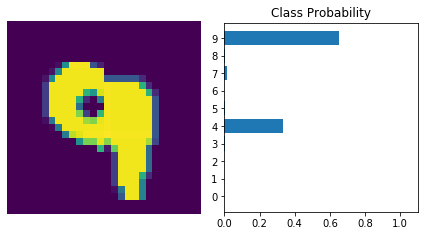

In [57]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)